In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [2]:
df=pd.read_csv("C:/Users/Don Augwin/OneDrive/Datasets/TATASTEEL.NS.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,11.172855,11.214964,11.035300,11.186892,2.487110,10242229.0
1,02-01-1996,11.172855,11.214964,10.951082,10.979155,2.440924,16954313.0
2,03-01-1996,10.979155,11.229000,10.951082,10.981962,2.441549,13514114.0
3,04-01-1996,10.807913,10.807913,10.386825,10.633863,2.364159,34785820.0
4,05-01-1996,10.504730,10.555260,10.316644,10.423319,2.317349,30138033.0


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6.960000e+03
mean,38.829010,39.443728,38.134010,38.759588,16.588219,6.932547e+07
std,30.692635,31.099186,30.207740,30.637873,22.045341,5.808903e+07
min,3.705570,3.910499,3.705570,3.775751,0.873765,0.000000e+00
25%,10.675270,10.807913,10.480868,10.607896,2.386555,3.254723e+07
50%,34.914051,35.444186,34.312809,34.850887,12.086423,5.339005e+07
75%,51.866982,52.586300,51.076497,51.834828,18.565130,8.688652e+07
max,161.486557,161.486557,161.486557,161.486557,131.750000,6.428460e+08


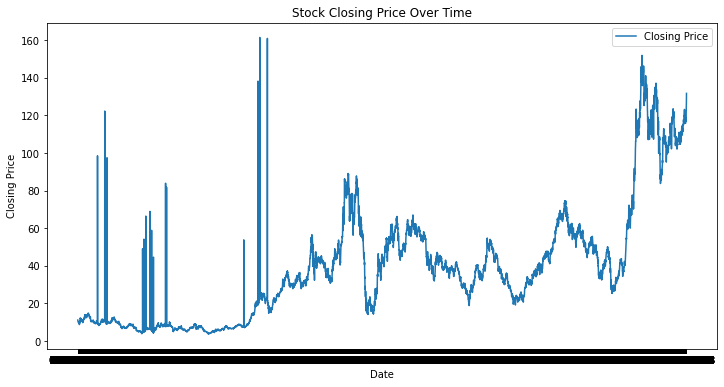

In [5]:
# Visualize the dataset
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.show()


In [9]:
data = df[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')  # Convert 'Date' column to datetime format
data.set_index('Date', inplace=True)


C:\Users\DONAUG~1\AppData\Local\Temp/ipykernel_2876/2142154110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')  # Convert 'Date' column to datetime format


In [13]:
# Forecasting for the last 90 days
forecast_steps = 90
forecast = results.forecast(steps=forecast_steps)

# Get the actual and predicted data for the last 90 days
actual_last_90_days = data['Close'].tail(90)
forecast_dates = pd.date_range(start=data.index[-90], periods=forecast_steps, freq='D')


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


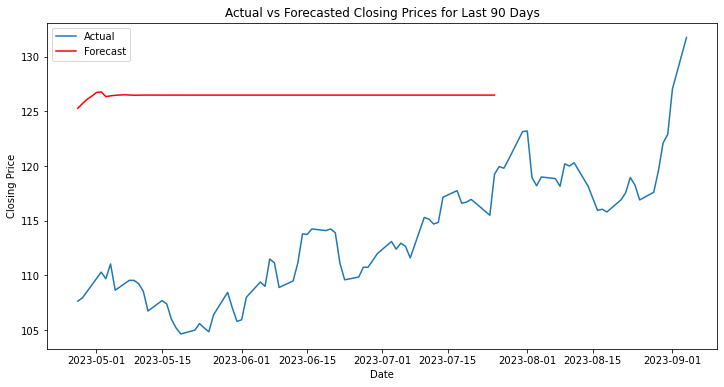

In [14]:
# Plot the comparison for the last 90 days
plt.figure(figsize=(12, 6))
plt.plot(actual_last_90_days.index, actual_last_90_days.values, label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Forecasted Closing Prices for Last 90 Days')
plt.legend()
plt.show()

In [15]:
#This the result while using arima model